In [12]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import imageio
import matplotlib.pyplot as plt


(66, 66)


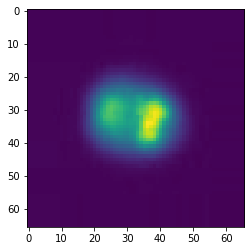

In [28]:
## Look at the some example images and compute basic stats
im = imageio.imread('/mnt/efs/woods_hole/bbbc_cellcycle/CellCycle/Anaphase/12432_Ch4.ome.jpg')
plt.imshow(im)
print(im.shape)

In [16]:
# Read and prepare data
data_dir = "/mnt/efs/woods_hole/bbbc_cellcycle/CellCycle"
batch_size = 32
img_height = 66
img_width = 66

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 129064 files belonging to 7 classes.
Using 103252 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 129064 files belonging to 7 classes.
Using 25812 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Anaphase', 'G1', 'G2', 'Metaphase', 'Prophase', 'S', 'Telophase']


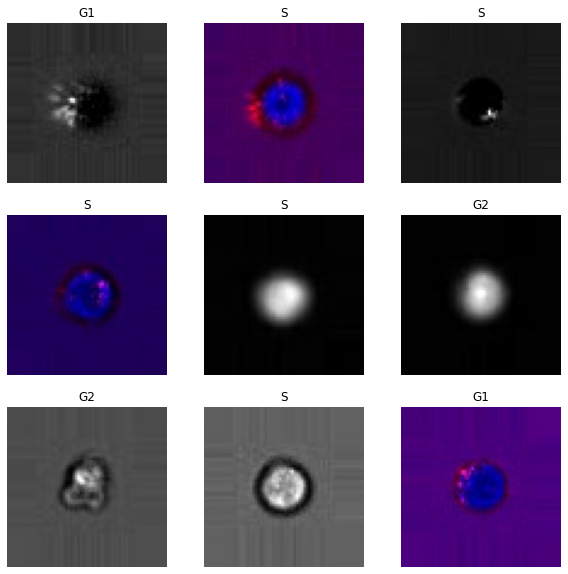

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    #print(images[i].shape)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 66, 66, 3)
(32,)


In [56]:
import pandas as pd
img_lst = pd.read_csv("/mnt/efs/woods_hole/bbbc_cellcycle/CellCycle/img.lst", sep="\t", header=None)


In [62]:
img_lst.columns = ['index','class','path']
#img_lst = img_lst.set_index('index')
img_lst['class'].unique()
#print(img_lst['class'].value_counts)

array([0, 4, 5, 1, 2, 6, 3])